In [30]:
#import modules from pandas and numpy
import numpy as np
import pandas as pd

#import modules for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import module for train_test_split
import sklearn as skl
from sklearn.model_selection import train_test_split

#import module for k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#import modules for encoding
from sklearn.preprocessing import LabelEncoder

#import scikit learn module for the pipeline
from sklearn.pipeline import Pipeline


# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()


In [31]:
#import modules from keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

In [32]:
# set the seed on number to get reproducible results
random_seed=7
np.random.seed(random_seed)

In [33]:
#load the data_set into the dataframe
pima_df=pd.read_csv("F:\Syed Issam Bukhari\Diabetes Detection\Data\Processed_Data\diabetes.csv",header=None, names=["preg","plas","pres","skin","test","mass","pedi","age","class"])


In [34]:
#Check if there are any null values
pima_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

# Exploratory Data Analysis on the data set

In [35]:
#getting shape
pima_df.shape

(768, 9)

In [36]:
#Viewing the data
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
#information about the data
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [39]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
pima_df.groupby("class").size()

class
0    500
1    268
dtype: int64

In [41]:
pima_df["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

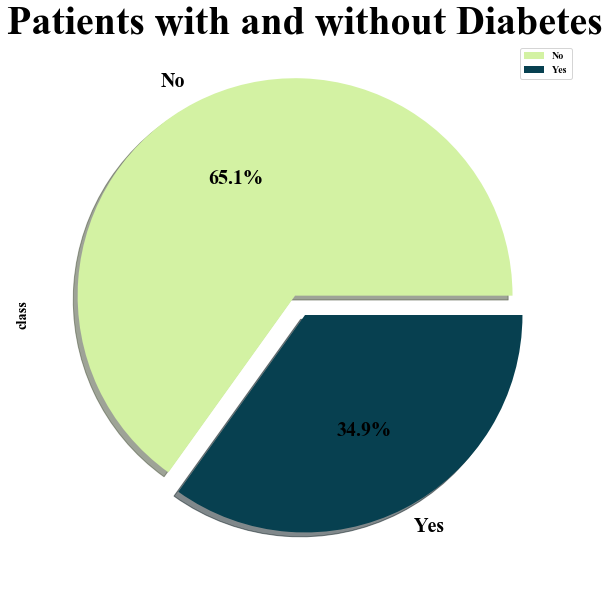

In [42]:
#pie chart for the classes
plt.style="seaborn-dark"
color_palatte=["#d3f2a3","#074050"]
plt.rcParams['axes.labelsize']='x-large'
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize']=40

pima_df["class"].value_counts().plot(kind="pie",colors=color_palatte, figsize=(10,10), autopct='%1.1f%%', title ="Patients with and without Diabetes", explode=[0.1,0], labels=["No","Yes"],legend=True,shadow=True, textprops={'fontsize': 20});


#pima_df["class"].plot(kind="bar")

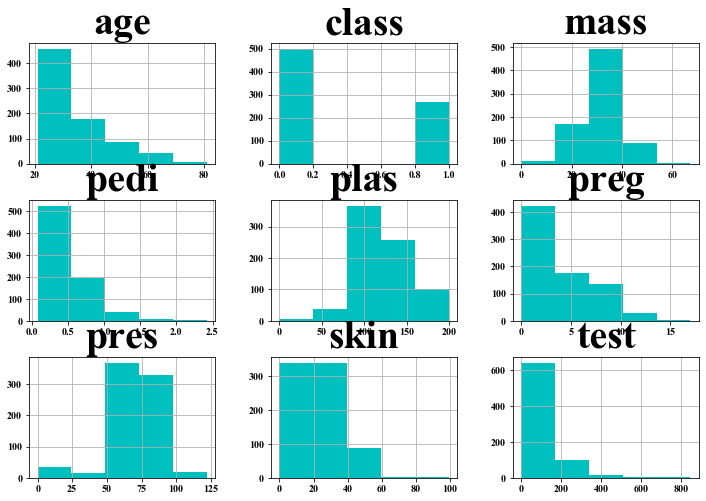

In [43]:
#histograms for all the numeric values in the data set
pima_df.hist(figsize=(12,8),sharex=False,bins=5,color='c');
#sns.distplot(pima_df, kde=False, color=["#fbe6c5","#f5ba98","#ee8a82","#dc7176","#c8586c","#9c3f5d","#70284a","#d3f2a3","#074050"], bins=5);

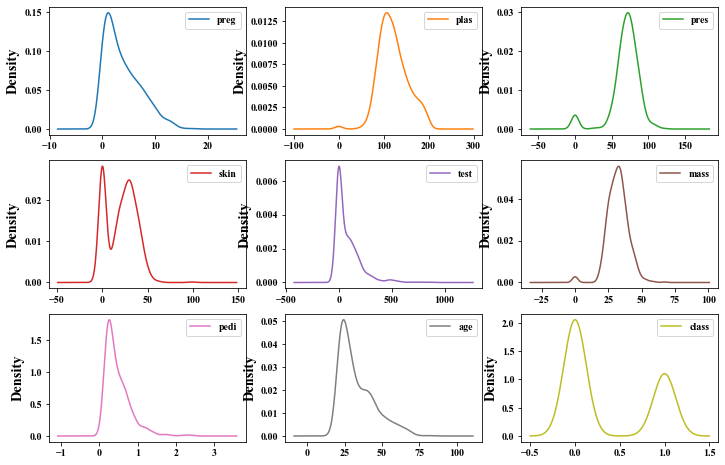

In [44]:
#density plots
pima_df.plot(kind="kde",subplots=True,layout=(3,3),figsize=(12,8),sharex=False,sharey=False,legend=True);

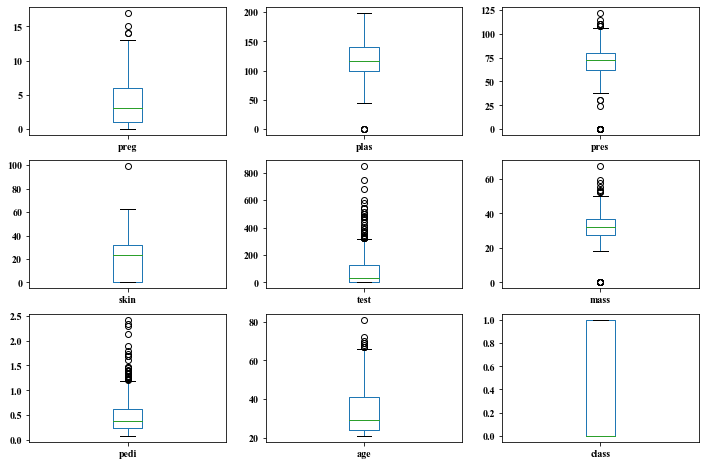

In [45]:
#box plot
pima_df.plot(kind="box",subplots=True,layout=(3,3),figsize=(12,8),sharex=False,sharey=False,legend=True);

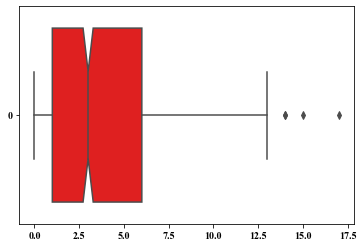

In [46]:
# we have outliers in almost all the variables
sns.boxplot(data=pima_df["preg"],orient="h",color="red",notch=True);


In [47]:
pima_df["preg"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: preg, dtype: int64

In [48]:
print("skin having outlier is:{}".format(pima_df.loc[pima_df["skin"]==0].skin.count()))
print("mass having outlier is:{}".format(pima_df.loc[pima_df["mass"]==0].mass.count()))
print("test having outlier is:{}".format(pima_df.loc[pima_df["test"]==0].mass.count()))
print("age having outlier is:{}".format(pima_df.loc[pima_df["age"]==0].mass.count()))
print("pedi having outlier is:{}".format(pima_df.loc[pima_df["pedi"]==0].pedi.count()))
print("pressure having 0 is:{}".format(pima_df.loc[pima_df["pres"]==0].pres.count()))
print("Plas having 0 is:{}".format(pima_df.loc[pima_df["plas"]==0].plas.count()))


skin having outlier is:227
mass having outlier is:11
test having outlier is:374
age having outlier is:0
pedi having outlier is:0
pressure having 0 is:35
Plas having 0 is:5


In [49]:
#mass has 11 - 0 rows, drop them
# It is impossible to have plasma values of 0,drop those rows
# Blood pressure has 35 0 values, drop them
# preg has 3 outliers, I am not removing it as i felt it may carry information

#skin has a lot of 0 values, cant remove them.
#insulin test has lot of 0 values cannot drop them
#pedi has many outliers
#age also has a lot of outliers


In [50]:
#extracting new dataset with the following conditions
pima_df_mod = pima_df[(pima_df.plas != 0) & (pima_df.pres != 0) & (pima_df.mass != 0)]

In [51]:
#Modified pima dataset
pima_df_mod.head()
pima_df_mod.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## Separate the dataset into input and output arrays

In [126]:
#getting the values into a numpy array
numpy_array=pima_df_mod.values
numpy_array[1,8]

0.0

In [127]:
pred_array=numpy_array[:,0:8]
print(pred_array)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [128]:
targ_array=numpy_array[:,8]
targ_array=targ_array.astype(int)
print(targ_array,targ_array.dtype)

[1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 

## Split input and output into train and test dataset

In [129]:
#train_size=67% and  test_size=33%
train_size=0.33
pred_train,pred_test,targ_train,targ_test=train_test_split(pred_array,targ_array,test_size=0.33,random_state=random_seed)

## Encode class values- One Hot Encoding

In [130]:
# For target-train dataset
# Encode class values as integers

Encoder_train=LabelEncoder()
E_targ_train=Encoder_train.fit_transform(targ_train)

#np_utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.
ohe_targ_train=np_utils.to_categorical(E_targ_train)

# For target-test dataset
# Encode class values as integers

Encoder_test=LabelEncoder()
E_targ_test=Encoder_train.fit_transform(targ_test)

#np_utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.
ohe_targ_test=np_utils.to_categorical(E_targ_test)



In [131]:

print(ohe_targ_train.shape)
print(ohe_targ_test.shape)


(485, 2)
(239, 2)


# Build an MLP with 3 layers


## 3 layer MLP implies a neural neutwork with an input layer, 2 hidden layers and output layer
## We have 8 predictors, so the input layer will have 8 neurons and we are using ReLU as act function
## The hidden layer can have 16 neurons nd we are using ReLU as act function.
## We have two types of outputs- 1 and 0.Therefore output layer will have 2 neuronsnd we are using softmax as act function.

In [132]:
#building model
mlp_model=Sequential()

#add layers
mlp_model.add(Dense(16,input_dim=8, activation="relu"))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(2,activation="softmax"))

## we are setting the configurations for decreasing the loss function- crossentropy and the optimizer adam

In [133]:
#compile the model - setting the model configurations

mlp_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
#defining function for this baselinemodel
def baseline_model():
    #building model
    model1=Sequential()
    #add layers
    model1.add(Dense(12,input_dim=8, activation="relu"))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dense(2,activation="softmax"))
    #compile the model - setting the model configurations
    model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model1
    

In [135]:
mlp_2_model=baseline_model()

In [154]:
mlp_2_model.fit(x=pred_train,y=ohe_targ_train,batch_size=10,epochs=150)

Epoch 1/150
485/485 [==============================] - 0s 458us/step - loss: 0.4796 - accuracy: 0.7711
Epoch 2/150
485/485 [==============================] - 0s 118us/step - loss: 0.4954 - accuracy: 0.7629
Epoch 3/150
485/485 [==============================] - 0s 97us/step - loss: 0.4938 - accuracy: 0.7691
Epoch 4/150
485/485 [==============================] - 0s 106us/step - loss: 0.4842 - accuracy: 0.7814
Epoch 5/150
485/485 [==============================] - 0s 113us/step - loss: 0.4803 - accuracy: 0.7773
Epoch 6/150
485/485 [==============================] - 0s 102us/step - loss: 0.4824 - accuracy: 0.7876
Epoch 7/150
485/485 [==============================] - 0s 94us/step - loss: 0.4861 - accuracy: 0.7794
Epoch 8/150
485/485 [==============================] - 0s 102us/step - loss: 0.4820 - accuracy: 0.7753
Epoch 9/150
485/485 [==============================] - 0s 94us/step - loss: 0.4861 - accuracy: 0.7629
Epoch 10/150
485/485 [==============================] - 0s 99us/step - loss:

In [155]:
scores_trained= mlp_2_model.evaluate(x=pred_train,y=ohe_targ_train)

485/485 [==============================] - 0s 20us/step


In [156]:
print("The accuracy of the model on the trained data set is {0:5.2f}".format(scores_trained[1]*100))


The accuracy of the model on the trained data set is 80.21


In [157]:
accuracy_trained=scores_trained[1]*100

In [158]:
scores_test=mlp_2_model.evaluate(x=pred_test,y=ohe_targ_test)


239/239 [==============================] - 0s 28us/step


In [159]:
print("The accuracy of the model on the test data set is {0:5.2f}".format(scores_test[1]*100))


The accuracy of the model on the test data set is 71.13


In [160]:
accuracy_test=scores_test[1]*100

## Evaluating using k-fold cross validation model

In [143]:
#create kerasclassifier to evaluate the model
classifier = KerasClassifier(build_fn = baseline_model,
                            batch_size=10, nb_epoch=200)

In [144]:
#Use Kfold cross validation to evaluate the model
kfold=KFold(n_splits=10,random_state=random_seed,shuffle=True)

In [145]:
ohe=np.concatenate((ohe_targ_train, ohe_targ_test), axis=0)

In [146]:
# Evaluate the model
#Accuracies=cross_val_score(estimator=classifier,X=pred_array,y=ohe,cv=kfold)
Accuracies=cross_val_score(estimator=classifier,X=pred_test,y=ohe_targ_test,cv=kfold)


Epoch 1/1
24/24 [==============================] - 0s 933us/step
Epoch 1/1
24/24 [==============================] - 0s 1ms/step
Epoch 1/1
24/24 [==============================] - 0s 928us/step
Epoch 1/1
24/24 [==============================] - 0s 930us/step
Epoch 1/1
24/24 [==============================] - 0s 939us/step
Epoch 1/1
24/24 [==============================] - 0s 903us/step
Epoch 1/1
24/24 [==============================] - 0s 898us/step
Epoch 1/1
24/24 [==============================] - 0s 1ms/step
Epoch 1/1
24/24 [==============================] - 0s 923us/step
Epoch 1/1
23/23 [==============================] - 0s 1ms/step


In [147]:
print("The accuracy of the model on the test data set using k-fold cross validation is {0:5.2f} with std of {0:5.2f}".format(Accuracies.mean()*100))

The accuracy of the model on the test data set using k-fold cross validation is 51.43 with std of 51.43
